# Analysis of Ad AB Test Results

1. [Description](#description)
2. [Exploratory Data Analysis (EDA)](#eda)
3. [Analysis of Ad Impressions and User Interactions](#analysis-of-ad-impressions-and-user-interactions)
4. [Sanity Checks](#sanity-checks)
    - [Sample Ratio Mismatch](#sample-ratio-mismatch)
    - [Distributions Balance](#distributions-balance)
5. [Hypothesis Testing](#hypothesis-testing)
6. [Conclusions and Recommendations](#conclusions-and-recommendations)

## Description

**Objective:**

Evaluate the effectiveness of a creative, interactive online advertisement for the SmartAd brand.

**Experiment Description:**

The experiment compares the effectiveness of two ads: a standard control ad and a creative exposed ad for SmartAd. The goal is to determine if the creative ad leads to higher user engagement.

**BIO** stands for **"Banner Interaction Overlay"**. This questionnaire appears as an overlay on the ad, with two response options:
- **Yes:** Indicates interest.
- **No:** Indicates lack of interest.

If a user sees the BIO but doesn’t respond, both the "yes" and "no" values will be zero.

**Key Details:**

- **Groups:** Control (dummy ad) vs. Exposed (creative ad).
- **Data Attributes:**
  - **auction_id:** Unique ID for each user impression.
  - **experiment:** Group assignment (control or exposed).
  - **date:** Date in YYYY-MM-DD format.
  - **hour:** Hour in HH format.
  - **device_make:** Type of device (e.g., Samsung).
  - **platform_os:** Operating system ID.
  - **browser:** Browser used to view the BIO questionnaire.
  - **yes:** User chose "Yes" on the BIO questionnaire.
  - **no:** User chose "No" on the BIO questionnaire.

**Goal:**

Determine if the creative ad increases user engagement compared to the dummy ad.


**Data Source:**

The dataset used for this analysis can be found at [Kaggle: AD AB Testing](https://www.kaggle.com/datasets/osuolaleemmanuel/ad-ab-testing/data).


## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [2]:
# Setting the style of Seaborn plots
sns.set_style('whitegrid') 
sns.set_palette('husl', 8)

hue_order = ['exposed', 'control']

In [3]:
df = pd.read_csv('/home/anna/data/ad_smart_ab_data.csv')

In [4]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [6]:
# Сonverting the date column to the appropriate format
df['date'] = pd.to_datetime(df['date'])

In [7]:
# Checking for missing values
df.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [8]:
# Checking for duplicates
df.duplicated().sum()

0

In [9]:
# Checking for duplicate user IDs
df['auction_id'].duplicated().sum()

0

In [10]:
# Let's look at the number of users in both groups
df.groupby('experiment')['auction_id'].count()

experiment
control    4071
exposed    4006
Name: auction_id, dtype: int64

In [11]:
# Double-checking that each group has unique users
df.groupby('experiment')['auction_id'].nunique()

experiment
control    4071
exposed    4006
Name: auction_id, dtype: int64

In [12]:
# Checking for rows where True values have mistakenly been recorded in both responses
df[(df['yes'] == 1) & (df['no'] == 1)]

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no


In [13]:
# Checking for values other than 0 or 1 in the rows
display(df['yes'].unique(), df['no'].unique())


array([0, 1])

array([0, 1])

The dataset does not contain any missing values, duplicates, or erroneous entries.

In [14]:
# Test duration
start_date = df['date'].min().date()
end_date = df['date'].max().date()
duration = (df['date'].max() - df['date'].min()).days + 1

print(f"Test start date: {start_date}\n"
      f"Test end date: {end_date}\n"
      f"Duration: {duration} days")

Test start date: 2020-07-03
Test end date: 2020-07-10
Duration: 8 days


## Analysis of ad impressions and user interactions 

Let's examine the distribution of ad impressions and the trend of interactions with the BIO questionnaire.

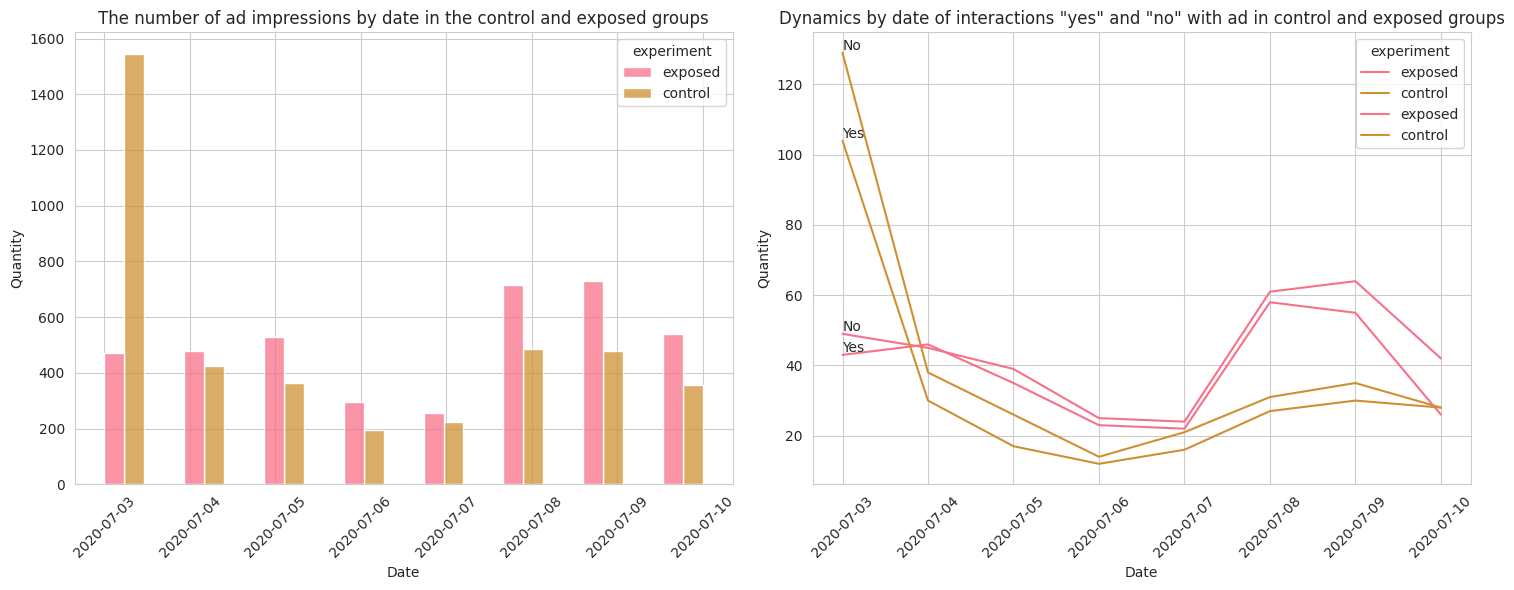

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True)

# Histogram of the total number of ad impressions by day
sns.histplot(data=df.sort_values(by='date'), x='date', hue='experiment', hue_order=hue_order, multiple='dodge', ax=axes[0])

axes[0].set_title('The number of ad impressions by date in the control and exposed groups')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Quantity')
axes[0].tick_params(axis='x', rotation=45)

# Line plots of user interactions with the ad

daily_interactions = df.groupby(['date', 'experiment'])[['yes', 'no']].sum().reset_index()

sns.lineplot(data=daily_interactions, x='date', y='no', hue='experiment', hue_order=hue_order, ax=axes[1])
sns.lineplot(data=daily_interactions, x='date', y='yes', hue='experiment', hue_order=hue_order, ax=axes[1])

axes[1].set_title('Dynamics by date of interactions "yes" and "no" with ad in control and exposed groups')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Quantity')
axes[1].tick_params(axis='x', rotation=45)

# Adding labels to indicate "yes" and "no" responses
min_date = daily_interactions['date'].min()
for experiment in daily_interactions['experiment'].unique():
    yes_data = daily_interactions[
        (daily_interactions['experiment'] == experiment) & 
        (daily_interactions['date'] == min_date)
    ]
    no_data = daily_interactions[
        (daily_interactions['experiment'] == experiment) & 
        (daily_interactions['date'] == min_date)
    ]
    
    axes[1].text(min_date, yes_data['yes'].values[0], 'Yes', verticalalignment='bottom')
    axes[1].text(min_date, no_data['no'].values[0], 'No', verticalalignment='bottom')

plt.tight_layout();

It is evident that on the first day of the test, there were many impressions in the control group. However, over the week, impressions in the experimental group started to prevail. Ad impressions were not evenly distributed across days.

The trend in user interactions with the form roughly mirrors the ad impressions trend. That is, the number of interactions with the ad increases and decreases in line with the number of impressions.

Let's also look at the distribution of ad impressions by hour for each day.

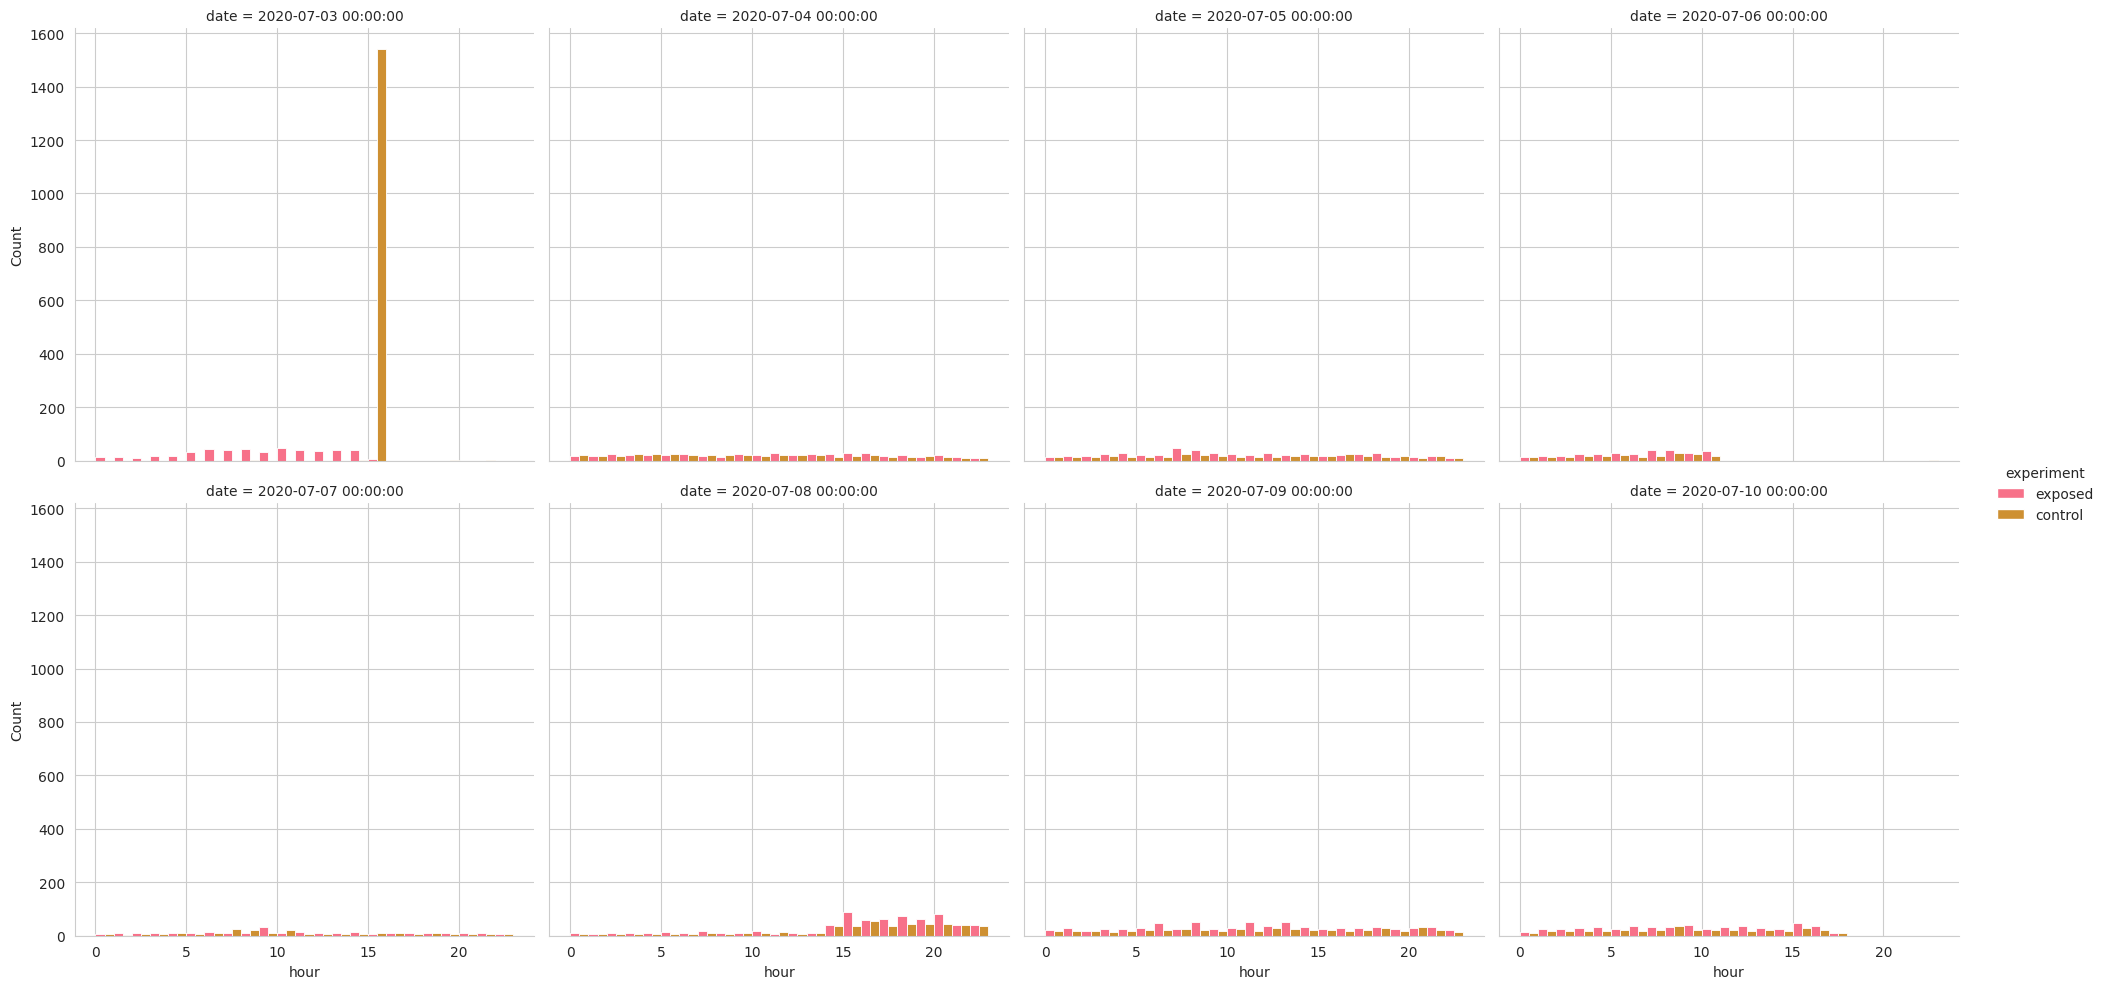

In [16]:
sns.displot(df.sort_values(by=['date','experiment']), x='hour', col='date', bins=range(24), 
            hue='experiment', hue_order=hue_order, alpha=1, multiple="dodge", col_wrap=4, facet_kws=dict(sharey=True));

A noticeable anomaly is evident in the number of ad impressions at 15.00 in the control group. This could have disrupted the proportion of ad impressions between the two groups and potentially skewed the test results.

Additionally, there is an uneven distribution of ad impressions. Specifically, on 2020-07-03 after 16.00, on 2020-07-06 after 11.00 and 2020-07-10 after 18.00 there are no ad impressions recorded.

Investigating the response rate.  
Additionally let's examine the dinamics of the response rate by hours and days of the week.

In [17]:
# Creating a column to indicate whether a user responded or not
# with "1" for pressing "yes" or "no" and "0" for ignoring
def responded(row):
    if row['yes'] == 0 and row['no'] == 0:
        return 0
    else:
        return 1

df['response'] = df.apply(responded, axis=1)

In [18]:
# Since the test started on a Friday, we will adjust the order of the days of the week accordingly for the chart
ordered_days = ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']

df['day_of_week'] = df['date'].dt.day_name()
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=ordered_days, ordered=True)

response_rate_date_hour = df.groupby(
    ['date', 'day_of_week', 'hour', 'experiment'])['response'].mean().reset_index()

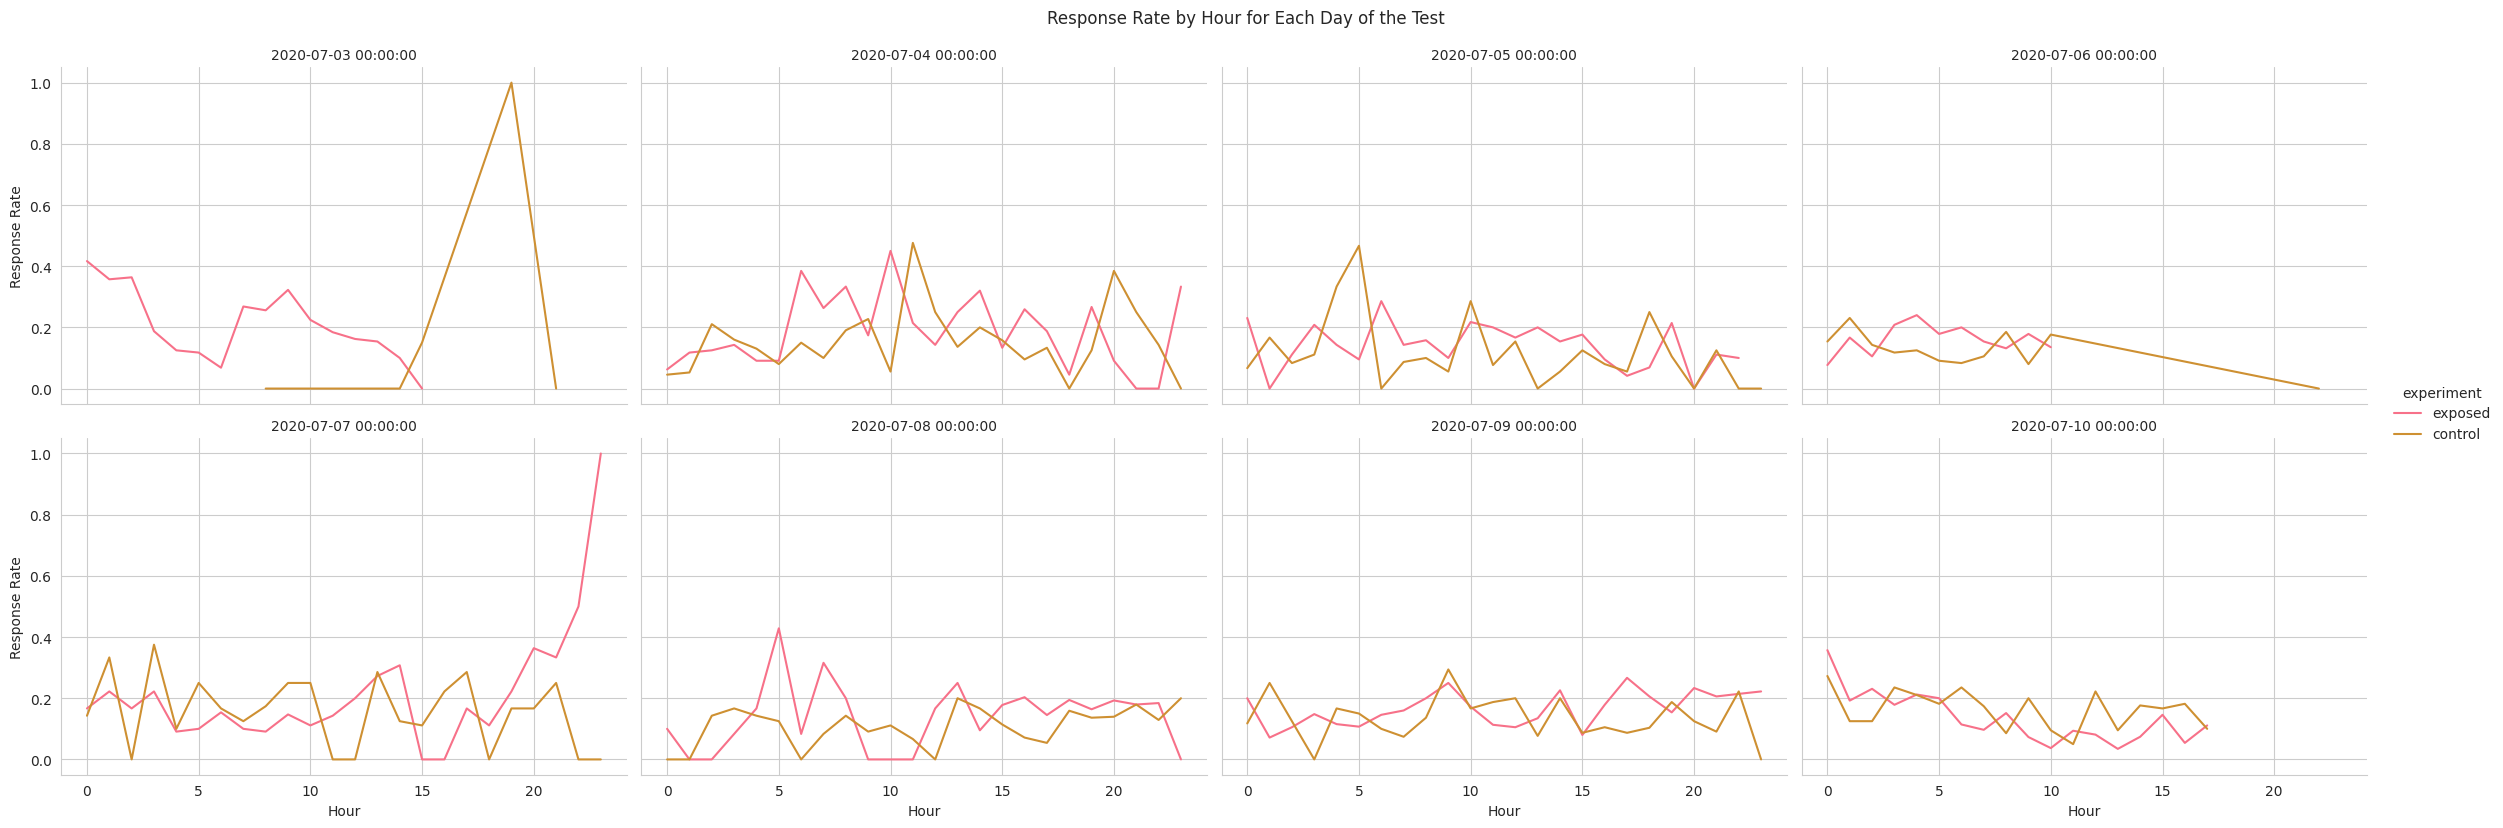

In [19]:
g = sns.relplot(
    data=response_rate_date_hour,
    x='hour', y='response', col='date', hue='experiment', 
    hue_order=hue_order, kind='line', col_wrap=4, height=4, aspect=1.5
)

g.set_titles("{col_name}")
g.set_axis_labels("Hour", "Response Rate")
g.fig.suptitle('Response Rate by Hour for Each Day of the Test', y=1.03)

plt.show()

It is evident that the response rate fluctuates throughout the day, with no clear pattern of higher activity at specific hours. Instead, the effects of uneven ad impressions on 2020-07-03, 2020-07-06 and 2020-07-10 are noticeable here.

''

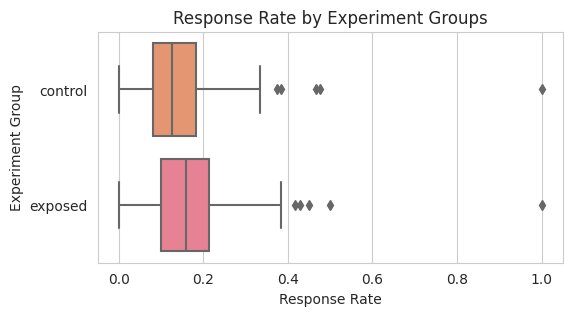

In [20]:
plt.figure(figsize=(6, 3))

sns.boxplot(data=response_rate_date_hour, x='response', y='experiment', palette=['#f78f5f', '#f77189'])

plt.xlabel('Response Rate')
plt.ylabel('Experiment Group')
plt.title('Response Rate by Experiment Groups');
;

It is observed that the exposed group has a higher average response rate and greater variability. Both groups contain outliers.

In [21]:
# Function to detect outliers based on IQR
def remove_outliers_iqr(group):
    Q1 = group['response'].quantile(0.25)
    Q3 = group['response'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filtered_group = group[(group['response'] >= lower_bound) & (group['response'] <= upper_bound)]
    return filtered_group

# Outlier-free response rate table
response_clean = response_rate_date_hour.groupby('experiment').apply(remove_outliers_iqr).reset_index(drop=True)

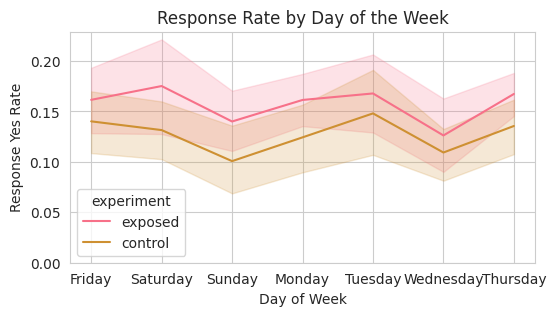

In [22]:
# Weekday response rate chart based on outlier-free data for a clearer view of ad effectiveness
plt.figure(figsize=(6, 3))

sns.lineplot(data =response_clean, 
            x='day_of_week', y='response', hue='experiment', hue_order=hue_order)

plt.ylim(bottom=0)
plt.xlabel('Day of Week')
plt.ylabel('Response Yes Rate')
plt.title('Response Rate by Day of the Week');


The highest response rates are observed on Saturday and Tuesday, while the lowest is on Sunday. However, a single week of testing is insufficient to identify clear trends by day of the week.

There is also not enough consistency in the data to determine the best hours for user interactions with the ad.

Based on the analysis of ad impressions and user responses, it is recommended to ensure a more uniform distribution of ad impressions for future tests and to extend the test duration to two weeks.

## Sanity checks

#### Sample Ratio Mismatch 
Checking whether the ratio of users in the two groups matches the planned 50/50 for accurate test analysis 

Н0 - SRM likely not present  
H1 - SRM may be present

In [23]:
# Calculating the number of users in the control and exposed groups
control_users = df[df['experiment'] == 'control']['auction_id'].count()
exposed_users = df[df['experiment'] == 'exposed']['auction_id'].count()

total_users = control_users + exposed_users

print(f'Percentage of users\nControl group - {control_users/total_users*100:.2f} %\n'
      f'Exposed group - {exposed_users/total_users*100:.2f} %')

Percentage of users
Control group - 50.40 %
Exposed group - 49.60 %


In [24]:
from scipy.stats import chisquare

observed = [ control_users, exposed_users ]
expected = [ total_users/2, total_users/2 ]

chi_stat, p_value = chisquare(observed, f_exp=expected)

print(p_value)

0.4695264353014863


In [25]:
# Creating a function to output results of subsequent tests
def hypothesis_result(p, a):
    if p <= a:
        return "Reject the null hypothesis"
    else:
        return "The null hypothesis can't be rejected"

In [26]:
# In this test, it is appropriate to use more stringent significance criteria, specifically setting alpha to 0.01
hypothesis_result(p_value, 0.01)

"The null hypothesis can't be rejected"

SRM likely not present. The ratio of users in the two groups is correct.

Given that SRM is not detected and the outliers in the response rate are few and due to randomness rather than technical error, we will leave the data unchanged for further analysis.

#### Distributions balance
Checking whether users are evenly distributed between the two groups across different browsers

In [27]:
df.groupby('experiment')['browser'].value_counts(normalize=True)

experiment  browser                   
control     Chrome Mobile                 0.591992
            Facebook                      0.137804
            Samsung Internet              0.120855
            Chrome Mobile WebView         0.071727
            Mobile Safari                 0.060427
            Chrome Mobile iOS             0.008352
            Mobile Safari UI/WKWebView    0.007369
            Pinterest                     0.000491
            Chrome                        0.000246
            Puffin                        0.000246
            Opera Mini                    0.000246
            Android                       0.000246
exposed     Chrome Mobile                 0.535197
            Chrome Mobile WebView         0.298802
            Samsung Internet              0.082876
            Facebook                      0.050674
            Mobile Safari                 0.022716
            Chrome Mobile iOS             0.004244
            Mobile Safari UI/WKWebView    0

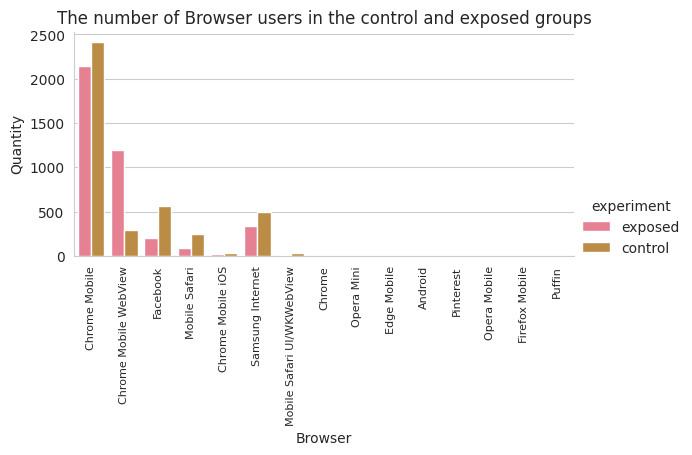

In [28]:
sns.catplot(data = df, x='browser', kind='count', hue='experiment', hue_order=hue_order, height=3, aspect=2)

plt.title('The number of Browser users in the control and exposed groups')
plt.xlabel('Browser')
plt.ylabel('Quantity');
plt.xticks(rotation=90, fontsize=8);

It is noticeable that the distribution of test participants by browser is not balanced. We will further verify this using a test:

H0 - The distribution by browser is balanced  
H1 - The distribution by browser has significant differences

In [29]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['experiment'], df['browser'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

p_value

1.553466437884029e-173

In [30]:
# From now on, a 5% significance level will be used
alpha = 0.05

In [31]:
hypothesis_result(p_value, alpha)

'Reject the null hypothesis'

There is a statistically significant difference in the distribution of users by browser between the two groups.

Checking whether users are evenly distributed between the two groups across different operating systems

In [32]:
df.groupby('experiment')['platform_os'].value_counts(normalize=True)

experiment  platform_os
control     6              0.924343
            5              0.075657
exposed     6              0.969795
            5              0.029955
            7              0.000250
Name: proportion, dtype: float64

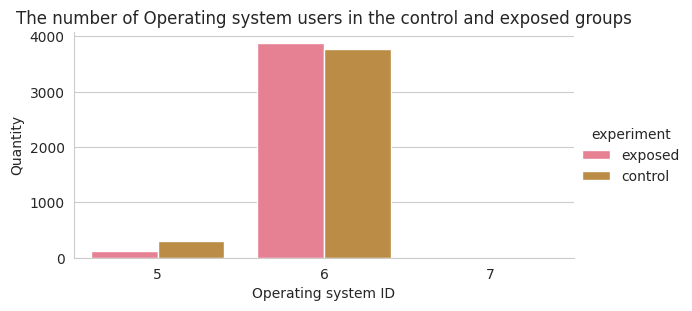

In [33]:
sns.catplot(data = df, x='platform_os', kind='count', hue='experiment', hue_order=hue_order, height=3, aspect=2)

plt.title('The number of Operating system users in the control and exposed groups')
plt.xlabel('Operating system ID')
plt.ylabel('Quantity');

In [34]:
# Let's check how many users are using platform 7.
df[df['platform_os'] == 7]

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,response,day_of_week
2332,4c4332e4-25ce-483b-a565-76a76a802ca6,exposed,2020-07-03,13,Lumia 950,7,Edge Mobile,0,0,0,Friday


In [35]:
# Before the test, we will exclude the record of this single user for accuracy
df_clean_os = df.drop(2332)

H0 - The distribution by operating system is balanced  
H1 - The distribution by operating system has significant differences

In [36]:
contingency_table_os = pd.crosstab(df_clean_os['experiment'], df_clean_os['platform_os'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_os)

p_value

7.864756276681052e-20

In [37]:
hypothesis_result(p_value, alpha)

'Reject the null hypothesis'

There is a statistically significant difference in the distribution of users by browser between the two groups.

Checking whether users are evenly distributed between the two groups based on device type.

In [38]:
df['device_make'].nunique()

269

In [39]:
df.groupby('experiment')['device_make'].value_counts(normalize=True).groupby(level=0, group_keys=False).nlargest(10)

experiment  device_make       
control     Generic Smartphone    0.592238
            iPhone                0.076394
            Samsung SM-G960F      0.025547
            Samsung SM-G973F      0.023581
            Samsung SM-G950F      0.016212
            Samsung SM-G930F      0.014001
            Samsung SM-G975F      0.012528
            Samsung SM-A202F      0.010808
            Samsung SM-A405FN     0.009580
            Samsung SM-A105FN     0.008597
exposed     Generic Smartphone    0.582127
            iPhone                0.030454
            Samsung SM-G960F      0.024713
            Samsung SM-G950F      0.020469
            Samsung SM-G973F      0.014478
            Samsung SM-A405FN     0.011982
            Nokia$2$3             0.011732
            Samsung SM-G975F      0.011483
            Samsung SM-A202F      0.010984
            Samsung SM-G930F      0.010734
Name: proportion, dtype: float64

Among the devices of users who saw the ad, there is a wide variety.

H0 - The distribution by device type is balanced  
H1 - The distribution by device type has significant differences

In [40]:
contingency_table_dev = pd.crosstab(df['experiment'], df['device_make'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_dev)

p_value

1.0878252726396005e-11

In [41]:
hypothesis_result(p_value, alpha)

'Reject the null hypothesis'

There is a statistically significant difference in the distribution of users by device type between the two groups.

It is also observed that some device names are recorded without specifying the model, while others have a wide variety of models. There is inconsistency in recording device models.

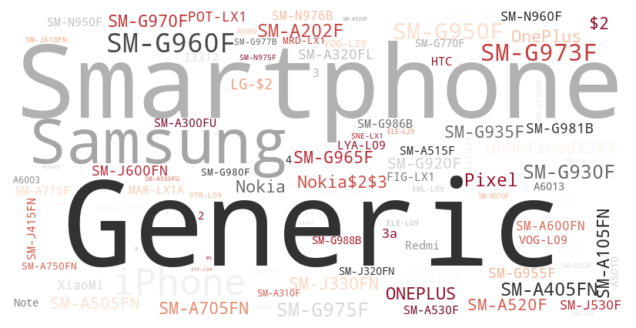

In [42]:
from collections import Counter
from wordcloud import WordCloud

# виокремлення слів та підрахунок найбільш частотних
all_brands = ' '.join(df['device_make'].astype(str).tolist())
words = all_brands.split()
word_freq = Counter(words)

wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    max_words=100,
    colormap='RdGy'
).generate_from_frequencies(word_freq)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


We see that the most frequently recorded device is "Generic Smartphone," which is neither a brand nor a model name. There are fewer records for brands like Samsung and iPhone, and even fewer for other brands such as Pixel, Nokia, and ONEPLUS.  

It is recommended to standardize the recording of device types.

## Hypothesis testing

In [43]:
df.groupby(['experiment'])['response'].agg(['sum', 'mean']).round(2)

,sum,mean
experiment,,
control,586,0.14
exposed,657,0.16


Average Response Rate:
- Control Group: 0.14
- Exposed Group: 0.16

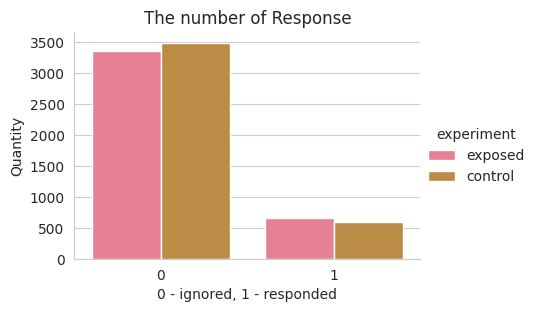

In [44]:
sns.catplot(data=df, x='response', kind='count', hue='experiment', hue_order=hue_order, height=3, aspect=1.5)

plt.title('The number of Response')
plt.xlabel('0 - ignored, 1 - responded')
plt.ylabel('Quantity');

H0 - There is no significant difference in user responses between standard ads and interactive ads  
H1 - There is a significant difference in user responses

In [45]:
contingency_table_response = pd.crosstab(df['experiment'], df['response'])

In [46]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_response)

p_value

0.013624237436461564

In [47]:
hypothesis_result(p_value, alpha)

'Reject the null hypothesis'

There is a statistically significant difference in how users interacted with the interactive ads. Overall, users interacted more with the interactive ads in the exposed group, while they tended to ignore the standard ads more.

Checking whether there is a statistically significant difference in the ratio of "yes" to "no" responses between the two groups, as we are interested in users clicking "yes" more.

In [48]:
# Creating a melted table for plotting a graph
melted_yes_no = (
    df.groupby('experiment')[['yes', 'no']].sum().reset_index()
    .melt(id_vars='experiment', var_name='respond', value_name='quatity')
)

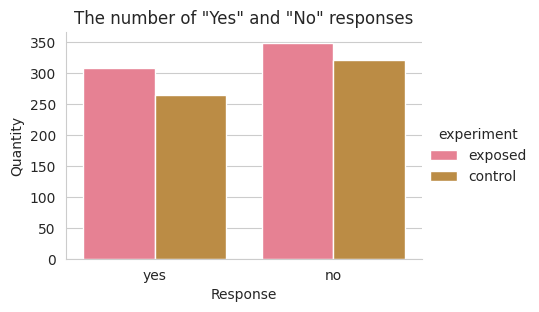

In [49]:
sns.catplot(
    data=melted_yes_no, x='respond', y='quatity', kind='bar', 
    hue='experiment', hue_order=hue_order, height=3, aspect=1.5)

plt.title('The number of "Yes" and "No" responses')
plt.xlabel('Response')
plt.ylabel('Quantity');

The graph shows that users clicked "no" more frequently in both groups. However, the exposed group received more "yes" responses than the control group.

H0 - There is no significant difference in the ratio of "yes" and "no" responses to standard ads compared to interactive ads  
H1 - There is a significant difference in the ratio of "yes" and "no" responses

In [50]:
contingency_table_yes_no = df.groupby('experiment')[['yes', 'no']].sum()

In [51]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_yes_no)

p_value

0.5560768104229136

In [52]:
hypothesis_result(p_value, alpha)

"The null hypothesis can't be rejected"

It cannot be concluded that there is a significant difference in the ratio of "yes" to "no" responses between the two groups.  
In other words, there is generally more interaction with interactive ads, without a clear preference for "yes" or "no" responses.

Additional check to determine if there is a statistically significant difference in the number of "yes" responses to standard versus interactive ads relative to the total number of ad impressions.

In [53]:
df.groupby('experiment')['yes'].mean().round(3)

experiment
control    0.065
exposed    0.077
Name: yes, dtype: float64

Average Yes Response Rate:
- Control Group: 0.065
- Exposed Group: 0.077

In [54]:
contingency_table_yes = pd.crosstab(df['experiment'], df['yes'])

In [55]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_yes)

p_value

0.03893119708315394

In [56]:
hypothesis_result(p_value, alpha)

'Reject the null hypothesis'

There is a statistically significant difference in the number of "yes" responses to standard versus interactive ads relative to the total number of ad impressions. Interactive ads received more "yes" responses.

## Conclusions and Recommendations

#### Conclusions:

- Users interacted more with interactive creative ads, responding with "yes" or "no" more frequently.  
- There was a statistically significant difference in the number of "yes" responses to interactive ads compared to standard ads relative to the total number of ad impressions.  
- Despite these findings, the test results should be interpreted with caution due to several issues:  
  - Imbalances were found in the distribution of users by browsers, operating systems, and devices.
  - Ad distribution was uneven, although the user ratio between the two groups was correct.


Average Yes Response Rate:
- Control Group: 0.065
- Exposed Group: 0.077  

Average Response Rate:
- Control Group: 0.14
- Exposed Group: 0.16

#### Recommendations:

- Conduct a follow-up test with improved technical implementation. Specifically, ensure more even ad impressions across both groups and balance the data distributions.  

- Extend the test duration to two weeks. This will help identify weekly and hourly variations, leading to better optimization of ad budgets.